# Visualize Fire Attribute Data 

This notebook creates several graphs to visualize varioius attributes of the distribution of wildfires within 1250 miles of Kearney, Nebraska from 1963-2020, using data from the US Wildfire datasets.  . 


# License 
This code was developed by Susan Boyd for use in HW1 assigned in DATA 512, a course in the UW MS Data Science degree program. This code is provided under an MIT license.


# Chat GPT Attribution
Some functions or code blocks in this Notebook were created with assistance from Chat GPT (https://chat.openai.com/). The impacted code is isolated in a function and the use of Chat GPT is noted, along with information on the prompts used to query Chat GPT provided at the end of the notebook.

# Step 0 Set up Notebook  

In [1]:
# import needed libraries 

import numpy as np
import pandas as pd
import geopandas as gpd
import geojson
import matplotlib.pyplot as plt
import time, json, folium
import seaborn as sns

# Step 1 Load Data 

Load and inspect the Fire Attribute Data 

In [2]:
f= "Data/fire_dat_merged.csv" 
fires = pd.read_csv(f)

In [3]:
fires.head()

,OID_,Assigned_Fire_Type,Fire_Year,GIS_Acres,Listed_Fire_Names,Listed_Fire_Dates,OBJECTID,Distance to Kearny,Closest long,Closest lat
0,14299,Wildfire,1963,40992.458271,RATTLESNAKE (4),Listed Wildfire Discovery Date(s): 1963-08-06 ...,14299.0,921.876100,-116.526584,44.207390
1,14300,Wildfire,1963,25757.090203,"McChord Butte (2), No Fire Name Provided (1), ...",Listed Wildfire Discovery Date(s): 1963-07-28 ...,14300.0,949.744559,-117.036017,44.470314
2,14301,Wildfire,1963,45527.210986,"WILLOW CREEK (16), EAST CRANE CREEK (4), Crane...",Listed Wildfire Discovery Date(s): 1963-08-06 ...,14301.0,914.071409,-116.333969,44.348362
3,14302,Wildfire,1963,10395.010334,"SOUTH CANYON CREEK (4), No Fire Name Provided (1)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,14302.0,871.999371,-115.702984,43.209292
4,14303,Wildfire,1963,9983.605738,WEBB CREEK (4),Listed Wildfire Discovery Date(s): 1963-08-06 ...,14303.0,911.236425,-116.332136,44.106657


In [4]:
fires.tail()

,OID_,Assigned_Fire_Type,Fire_Year,GIS_Acres,Listed_Fire_Names,Listed_Fire_Dates,OBJECTID,Distance to Kearny,Closest long,Closest lat
100967,135057,Prescribed Fire,2020,16.412148,WEW CA Broadcast (3),Listed Prescribed Fire End Date(s): 2020-01-01...,135057.0,1234.775921,-122.888919,43.744123
100968,135058,Prescribed Fire,2020,7.050837,2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Listed Prescribed Fire End Date(s): 2020-05-16...,135058.0,995.857697,-118.066014,44.010132
100969,135059,Prescribed Fire,2020,9.342668,2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Listed Prescribed Fire End Date(s): 2020-05-16...,135059.0,996.008493,-118.071394,43.995667
100970,135060,Prescribed Fire,2020,0.996962,2_WUI_Chicken Rx (1),Listed Prescribed Fire Start Date(s): 2020-07-...,135060.0,511.557181,-108.820949,40.604877
100971,135061,Prescribed Fire,2020,0.969953,Oak Basin (1),Listed Prescribed Fire End Date(s): 2020-01-01...,135061.0,1239.688431,-122.953923,44.320365


In [5]:
fires.shape

(100972, 10)

# Step 2:  Produce a histogram showing the number of fires occurring every 50 mile distance from Kearney Nebraska.

First, create some functions to group fires into "distance bins" to use in graphs later, than apply that to the fires dataframe.  

In [6]:

# define a function that sorts distances into 50 mile bins 

# See Chat GPR Attribution Note at end of notebook 

def create_dist_bins(df, col): 
    bin_edges = [i * 50 for i in range(26)]  # 0-50, 50-100, ..., 12450-12500
    bin_labels = [f"{bin_start}-{bin_end}" for bin_start, bin_end in zip(bin_edges[:-1], bin_edges[1:])]
    df['Distance Bins'] = pd.cut(df[col], bins=bin_edges, labels=bin_labels, include_lowest=True)
    return df 

In [7]:
# A more generic binning function in case we want to play around with bin_size
# This version of the function requires that you provide desired bin edges
# as a variable 

# See Chat GPR Attribution Note at end of notebook 

def create_bins_flex(df, col, bin_edges): 
    bin_labels = [f"{bin_start}-{bin_end}" for bin_start, bin_end in zip(bin_edges[:-1], bin_edges[1:])]
    df['Distance Bins Flex'] = pd.cut(df[col], bins=bin_edges, labels=bin_labels, include_lowest=True)
    return df 
    

In [8]:
# create a colun of bins of 50 miles 
col = "Distance to Kearny"
fires = create_dist_bins(fires, col)
fires.head()

,OID_,Assigned_Fire_Type,Fire_Year,GIS_Acres,Listed_Fire_Names,Listed_Fire_Dates,OBJECTID,Distance to Kearny,Closest long,Closest lat,Distance Bins
0,14299,Wildfire,1963,40992.458271,RATTLESNAKE (4),Listed Wildfire Discovery Date(s): 1963-08-06 ...,14299.0,921.876100,-116.526584,44.207390,900-950
1,14300,Wildfire,1963,25757.090203,"McChord Butte (2), No Fire Name Provided (1), ...",Listed Wildfire Discovery Date(s): 1963-07-28 ...,14300.0,949.744559,-117.036017,44.470314,900-950
2,14301,Wildfire,1963,45527.210986,"WILLOW CREEK (16), EAST CRANE CREEK (4), Crane...",Listed Wildfire Discovery Date(s): 1963-08-06 ...,14301.0,914.071409,-116.333969,44.348362,900-950
3,14302,Wildfire,1963,10395.010334,"SOUTH CANYON CREEK (4), No Fire Name Provided (1)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,14302.0,871.999371,-115.702984,43.209292,850-900
4,14303,Wildfire,1963,9983.605738,WEBB CREEK (4),Listed Wildfire Discovery Date(s): 1963-08-06 ...,14303.0,911.236425,-116.332136,44.106657,900-950


Now create the histogram

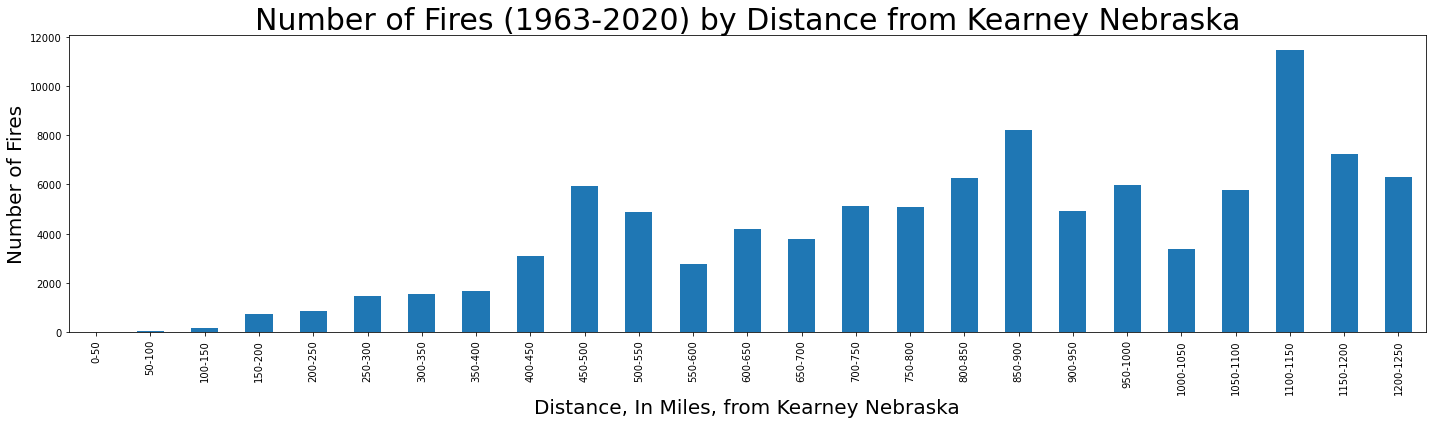

In [9]:
# Create Histogram 

# See Chat GPT Attrubution at end of notebook 

# Group the DataFrame by the 'Distance Bins' column and count the number of values in each bin
bin_counts = fires['Distance Bins'].value_counts().sort_index()

# Create a bar plot for the histogram
bin_plt = bin_counts.plot(kind='bar', figsize=(20, 6))

# Set labels and title using Matplotlib functions
plt.xlabel('Distance, In Miles, from Kearney Nebraska', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.title('Number of Fires (1963-2020) by Distance from Kearney Nebraska', fontsize = 30)

# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

# Save the plot as a JPG file
#plt.savefig('Histogram.jpg')




# Step 2A: Some other Interesting Data Visualizations (Beyond Part 1 Assignment) 

Let's also look at the distribution of fire sizes 
using a log scale for acres burned 

Text(0.5, 1.0, 'Distribution of Log(GIS_Acres)')

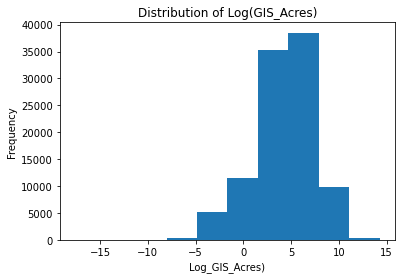

In [10]:
# Graph distribution of log acres burned 

log_GIS_Acres = np.log(fires['GIS_Acres'])
fires["Log_GIS_Acres"] = log_GIS_Acres

plt.hist(log_GIS_Acres, 
         bins=10)

plt.xlabel('Log_GIS_Acres)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(GIS_Acres)')



Next, examine how the distribution of acres burned differed by whether fire is prescribed or not 

In [11]:
fires["Assigned_Fire_Type"].drop_duplicates().to_list()
per= ['Prescribed Fire', 'Unknown - Likely Prescribed Fire']
per

['Prescribed Fire', 'Unknown - Likely Prescribed Fire']

In [12]:

# Filter the DataFrame based on 'Assigned_Fire_Type' being in 'per'
filtered_fires = fires[fires['Assigned_Fire_Type'].isin(per)]
Prescribed_acres = round(np.sum(filtered_fires["GIS_Acres"])/1000,0)
print("Total Acres burned from prescribed fires in thousands is", Prescribed_acres)
filtered_fires_other = fires[~fires['Assigned_Fire_Type'].isin(per)]
Wild_acres = round(np.sum(filtered_fires_other["GIS_Acres"])/1000,0)
print("Total Acres burned from prescribed wildfires or other in thousands is", Wild_acres)
percent_prescribed = Prescribed_acres/Wild_acres
print("5 of Total Acres burned that came from prescribed fires is", 100*round(percent_prescribed,2))


Total Acres burned from prescribed fires in thousands is 37049.0
Total Acres burned from prescribed wildfires or other in thousands is 140346.0
5 of Total Acres burned that came from prescribed fires is 26.0


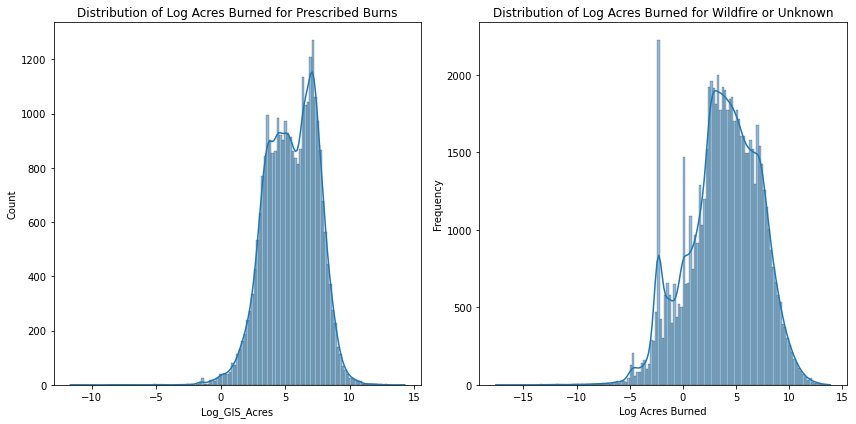

In [13]:
# Creat histograms of Acres burned by fire type 

# See Chat GPT Attribution note at end of notebook  

# Filter the DataFrame based on 'Assigned_Fire_Type' being in 'per'
filtered_fires = fires[fires['Assigned_Fire_Type'].isin(per)]

# Create two side-by-side histograms using Seaborn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=filtered_fires, x="Log_GIS_Acres", kde=True)
plt.title('Distribution of Log Acres Burned for Prescribed Burns')

# Filter the DataFrame for fire types not in 'per'
filtered_fires_other = fires[~fires['Assigned_Fire_Type'].isin(per)]

plt.subplot(1, 2, 2)
sns.histplot(data=filtered_fires_other, x="Log_GIS_Acres", kde=True)
plt.title('Distribution of Log Acres Burned for Wildfire or Unknown')

# Add labels and titles
plt.xlabel('Log Acres Burned')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


Prescribed burns and wildfires appear to havea roughly similar distributon of log(acres burned) centered at aprox 5; somewhat contrary to what I would have expected. 

# Step 3 - Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

In [14]:
# define a function that aggregates and expresses in thousands

def sum_in_thousands(x):
    return x.sum() / 1000


In [15]:
# Create a table of acres burned 
# We'll express Acres in thousands to make it more readable 
tbl = pd.pivot_table(fires, values ="GIS_Acres", index=["Fire_Year"], aggfunc=sum_in_thousands)
tbl = tbl.rename(columns={"GIS_Acres": "Total Acres Burned (K)"})

tbl.tail()




,Total Acres Burned (K)
Fire_Year,
2016,6951.410907
2017,10314.287732
2018,8354.256402
2019,2782.177411
2020,8294.435226


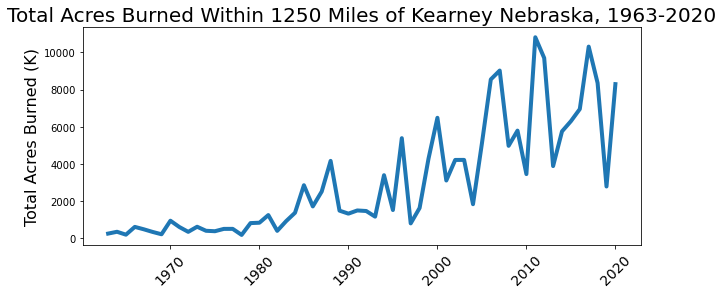

In [16]:
# Create plot 1963-2020

x = tbl.index
y = tbl["Total Acres Burned (K)"]

title = "Total Acres Burned Within 1250 Miles of Kearney Nebraska, 1963-2020"


fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, linewidth = 4)
plt.ylabel("Total Acres Burned (K)", fontsize = 16)
plt.xticks(rotation=45, fontsize = 14)  # Rotate the tick labels for better visibility

# Save the plot as a JPG file
f_out = "Visuals/Figure 1.jpg"
plt.savefig(f_out)
plt.savefig(f_out, bbox_inches="tight", pad_inches=0.1)

# Add title and display 
plt.title(title, fontsize = 20) 
plt.show(); 

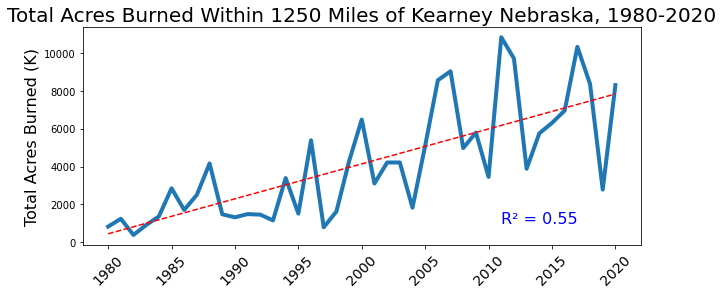

In [17]:
# Create plot 1980 - 2020 and add trend line 
# See Chat GPT attribution at end of notebook 
l = tbl.shape[0]
x = tbl.index[17:l]
y = tbl["Total Acres Burned (K)"][17:l]

title = "Total Acres Burned Within 1250 Miles of Kearney Nebraska, 1980-2020"


fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, linewidth = 4)
plt.ylabel("Total Acres Burned (K)", fontsize = 16)
plt.xticks(rotation=45, fontsize = 14)  # Rotate the tick labels for better visibility

# Fit a linear trendline & plot it
degree = 1 
coefficients = np.polyfit(x, y, degree)
trendline = np.polyval(coefficients, x)
ax.plot(x, trendline, label="Trendline", linestyle="--", color="red")  # Plotting the trendline


# Calculate R-squared and display it on plot 
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - trendline)**2)
r_squared = 1 - (ss_residual / ss_total)
r_squared
plt.annotate(f"R² = {r_squared:.2f}", xy=(0.75, 0.1), xycoords="axes fraction", fontsize=16, color="blue")



# Save the plot as a JPG file
f_out = "Visuals/Figure 2.jpg"
plt.savefig(f_out)
plt.savefig(f_out, bbox_inches="tight", pad_inches=0.1)

# Add title and display 
plt.title(title, fontsize = 20) 
plt.show(); 



plt.show();



# Step 3A: Some other Interesting Data Visualizations (Beyond Part 1 Assignment)

Lets also look at acres burned in distance bins

In [18]:
# creat some larger bins 
col = "Distance to Kearny"
bin_edges = [0, 400, 800, 1250] 
create_bins_flex(fires, col, bin_edges)
#fires.head()


,OID_,Assigned_Fire_Type,Fire_Year,GIS_Acres,Listed_Fire_Names,Listed_Fire_Dates,OBJECTID,Distance to Kearny,Closest long,Closest lat,Distance Bins,Log_GIS_Acres,Distance Bins Flex
0,14299,Wildfire,1963,40992.458271,RATTLESNAKE (4),Listed Wildfire Discovery Date(s): 1963-08-06 ...,14299.0,921.876100,-116.526584,44.207390,900-950,10.621143,800-1250
1,14300,Wildfire,1963,25757.090203,"McChord Butte (2), No Fire Name Provided (1), ...",Listed Wildfire Discovery Date(s): 1963-07-28 ...,14300.0,949.744559,-117.036017,44.470314,900-950,10.156465,800-1250
2,14301,Wildfire,1963,45527.210986,"WILLOW CREEK (16), EAST CRANE CREEK (4), Crane...",Listed Wildfire Discovery Date(s): 1963-08-06 ...,14301.0,914.071409,-116.333969,44.348362,900-950,10.726065,800-1250
3,14302,Wildfire,1963,10395.010334,"SOUTH CANYON CREEK (4), No Fire Name Provided (1)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,14302.0,871.999371,-115.702984,43.209292,850-900,9.249081,800-1250
4,14303,Wildfire,1963,9983.605738,WEBB CREEK (4),Listed Wildfire Discovery Date(s): 1963-08-06 ...,14303.0,911.236425,-116.332136,44.106657,900-950,9.208700,800-1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100967,135057,Prescribed Fire,2020,16.412148,WEW CA Broadcast (3),Listed Prescribed Fire End Date(s): 2020-01-01...,135057.0,1234.775921,-122.888919,43.744123,1200-1250,2.798022,800-1250
100968,135058,Prescribed Fire,2020,7.050837,2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Listed Prescribed Fire End Date(s): 2020-05-16...,135058.0,995.857697,-118.066014,44.010132,950-1000,1.953146,800-1250
100969,135059,Prescribed Fire,2020,9.342668,2_PHMA_FIAT_Beulah_East_Bendire_NW_Malheur_Pri...,Listed Prescribed Fire End Date(s): 2020-05-16...,135059.0,996.008493,-118.071394,43.995667,950-1000,2.234592,800-1250
100970,135060,Prescribed Fire,2020,0.996962,2_WUI_Chicken Rx (1),Listed Prescribed Fire Start Date(s): 2020-07-...,135060.0,511.557181,-108.820949,40.604877,500-550,-0.003043,400-800


In [19]:
# Create summary table per bin

tbl2 = pd.pivot_table(fires, values ="GIS_Acres", index=["Fire_Year"], columns = ["Distance Bins Flex"], aggfunc=sum_in_thousands)
tbl2.tail()




Distance Bins Flex,0-400,400-800,800-1250
Fire_Year,,,
2016,2701.469337,1595.716563,2654.225007
2017,2901.962639,2441.544980,4970.780113
2018,1667.197794,2393.992932,4293.065676
2019,67.381196,1194.472245,1520.323970
2020,686.853735,1824.534986,5783.046504


In [20]:
piv_cols = tbl2.columns[0:3]

In [21]:
# pivot the data 


tbl2["Fire_Year"] = tbl2.index.tolist()
tbl3 = pd.melt(tbl2, id_vars = "Fire_Year", value_vars = piv_cols, var_name = "Miles Away", value_name = "Total Acres Burned (K)")
tbl3

,Fire_Year,Miles Away,Total Acres Burned (K)
0,1963,0-400,1.098295
1,1964,0-400,14.390250
2,1965,0-400,18.675471
3,1966,0-400,3.659214
4,1967,0-400,NaN
...,...,...,...
169,2016,800-1250,2654.225007
170,2017,800-1250,4970.780113
171,2018,800-1250,4293.065676
172,2019,800-1250,1520.323970


Text(0.5, 1.0, 'Total Acres Burned Within 1250 Miles of Kearny Nebraska, 1963-2020')

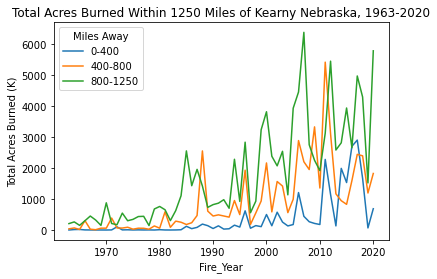

In [22]:
# Create time series graph of acres burned (K) per years by bin 

data = tbl3
x_name = "Fire_Year"
y_name = "Total Acres Burned (K)"
cat_var = "Miles Away"
title = "Total Acres Burned Within 1250 Miles of Kearny Nebraska, 1963-2020"
plt_time_multi = sns.lineplot(x=x_name, 
             y=y_name, 
             hue=cat_var,
             data=tbl3)

plt_time_multi.set_title(title)

In [23]:
yrs = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
tbl4 = tbl3[tbl3["Fire_Year"].isin(yrs)]
tbl4.head(10)


,Fire_Year,Miles Away,Total Acres Burned (K)
43,2006,0-400,1208.573557
44,2007,0-400,442.695617
45,2008,0-400,267.036464
46,2009,0-400,212.520016
47,2010,0-400,178.113639
48,2011,0-400,2278.231244
49,2012,0-400,1146.430683
50,2013,0-400,132.786109
51,2014,0-400,1989.167747
52,2015,0-400,1531.899683


Text(0.5, 1.0, 'Total Acres Burned Within 1250 Miles of Kearny Nebraska, 2006-2018')

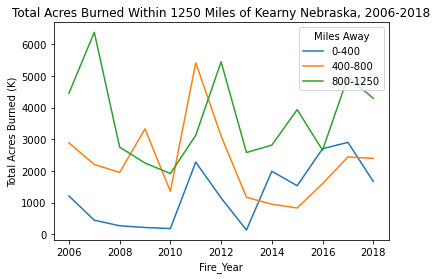

In [24]:
dat = tbl4
x_name = "Fire_Year"
y_name = "Total Acres Burned (K)"
cat_var = "Miles Away"
title = "Total Acres Burned Within 1250 Miles of Kearny Nebraska, 2006-2018"
plt_time_multi = sns.lineplot(x=x_name, 
             y=y_name, 
             hue=cat_var,
             data=dat)

plt_time_multi.set_title(title)

 Let's also examine distribution in number of fires 

In [25]:
# Table of fires per year 
tbl2 = pd.pivot_table(fires, values ="OID_", index=["Fire_Year"], aggfunc="count")
tbl2.head()

,OID_
Fire_Year,
1963,342
1964,318
1965,279
1966,391
1967,425


In [26]:
# display end of the table 
tbl2.tail()

,OID_
Fire_Year,
2016,4259
2017,4331
2018,4221
2019,3475
2020,4692


Text(0.5, 1.0, 'Number of Fires Per Year 1963-2020')

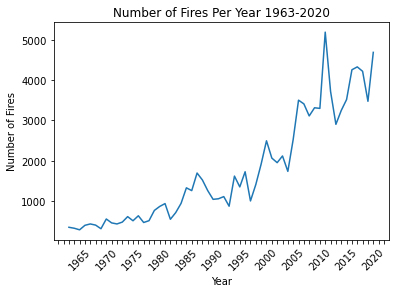

In [27]:
# create a graph of fires per year 
x=tbl2.index.values.tolist()
y1 = tbl2["OID_"]
plt.plot(x, y1, label='Number of Fires Per Year')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Set ticks every year
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x) if x % 5 == 0 else ''))

plt.xlabel("Year")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel("Number of Fires")
plt.title("Number of Fires Per Year 1963-2020")

# Chat GPT ATTRIBUTION 

The following function(s) or codeblock(s) contained in this notebook were written with assistance from Chat GPT available at: https://chat.openai.com/. In some cases, code suggested by Chat GPT was then further modified by the Notebook author, Sue Boyd

***
For assistance in writing the functions "create_dist_bins(df, col)" and "create_bins_flex", Chat GPT was given the following prompt:


I have a dataframe called fires that has a column called "Distance to Kearney".  Use that column to create a new column called "Distance Bins" that takes values: "0-50", "50-100", "100-150" and so forth up to "12450-12500" depending on which bin the distance value falls into 
***

For assistance writing the code block, "# Create Histogram", chat GPT was given the following prompt: 

Great.  Now use the resulting df to create a histogram that shows the number of values in each bin

*** 

For assistance writing the code block "# Creat histograms of Acres burned by fire type", chat GPT was given the following prompt:  


Now I want to group the dataframe by whether the column "Assigned_Fire_Type" has a value that is in the list "per" and show two side by side histograms with distribution of acres burned.  Write code to do this 

***
For assistance in writing the code block "# Create plot 1980 - 2020 and add trend line" Chat GPT was given the following prompt: 


"I have this code:
-# Create plot 1980 - 2020 and add trend line 
l = tbl.shape[0]
x = tbl.index[17:l]
y = tbl["Total Acres Burned (K)"][17:l]
title = "Total Acres Burned Within 1250 Miles of Kearney Nebraska, 1980-2020"
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, linewidth = 4)
plt.ylabel("Total Acres Burned (K)", fontsize = 16)
plt.xticks(rotation=45, fontsize = 14)  # Rotate the tick labels for better visibility
plt.title(title, fontsize = 20) 
-# Fit a linear trendline & plot it
degree = 1 
coefficients = np.polyfit(x, y, degree)
trendline = np.polyval(coefficients, x)
ax.plot(x, trendline, label="Trendline", linestyle="--", color="red")  # Plotting the trendline
plt.show();

AND 

"Extract the R squared from the model and display it on the plot."


